In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import HTML

In [2]:
%reset -f

In [3]:
import pandas as pd

# Path to your Excel file
file_path = 'Run1.xlsx'
sheet = 'Run1'
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())



                 Time     PRE  TEMP EXT  TEMP_CULTURE  PAR_LIGHT    PH     DO  \
0 2024-03-27 13:12:00  118.75      20.7          27.0       12.5  8.80  23.57   
1 2024-03-27 13:22:00  118.75      20.7          27.4       12.5  8.83  23.57   
2 2024-03-27 13:32:00  118.75      20.7          27.8       12.5  7.19  23.35   
3 2024-03-27 13:42:00  118.75      20.7          28.1       12.5  7.01  23.87   
4 2024-03-27 13:52:00  118.75      20.7          27.9       12.5  7.20  23.96   

     OD       DRY       CELL  VES  DES  Surface Tension  
0  0.55  0.191455  281000000    0    0                0  
1  0.58  0.201898  297000000    0    0                0  
2  0.62  0.215822  317000000    0    0                0  
3  0.64  0.222784  327000000    0    0                0  
4  0.66  0.229746  337000000    0    0                0  


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


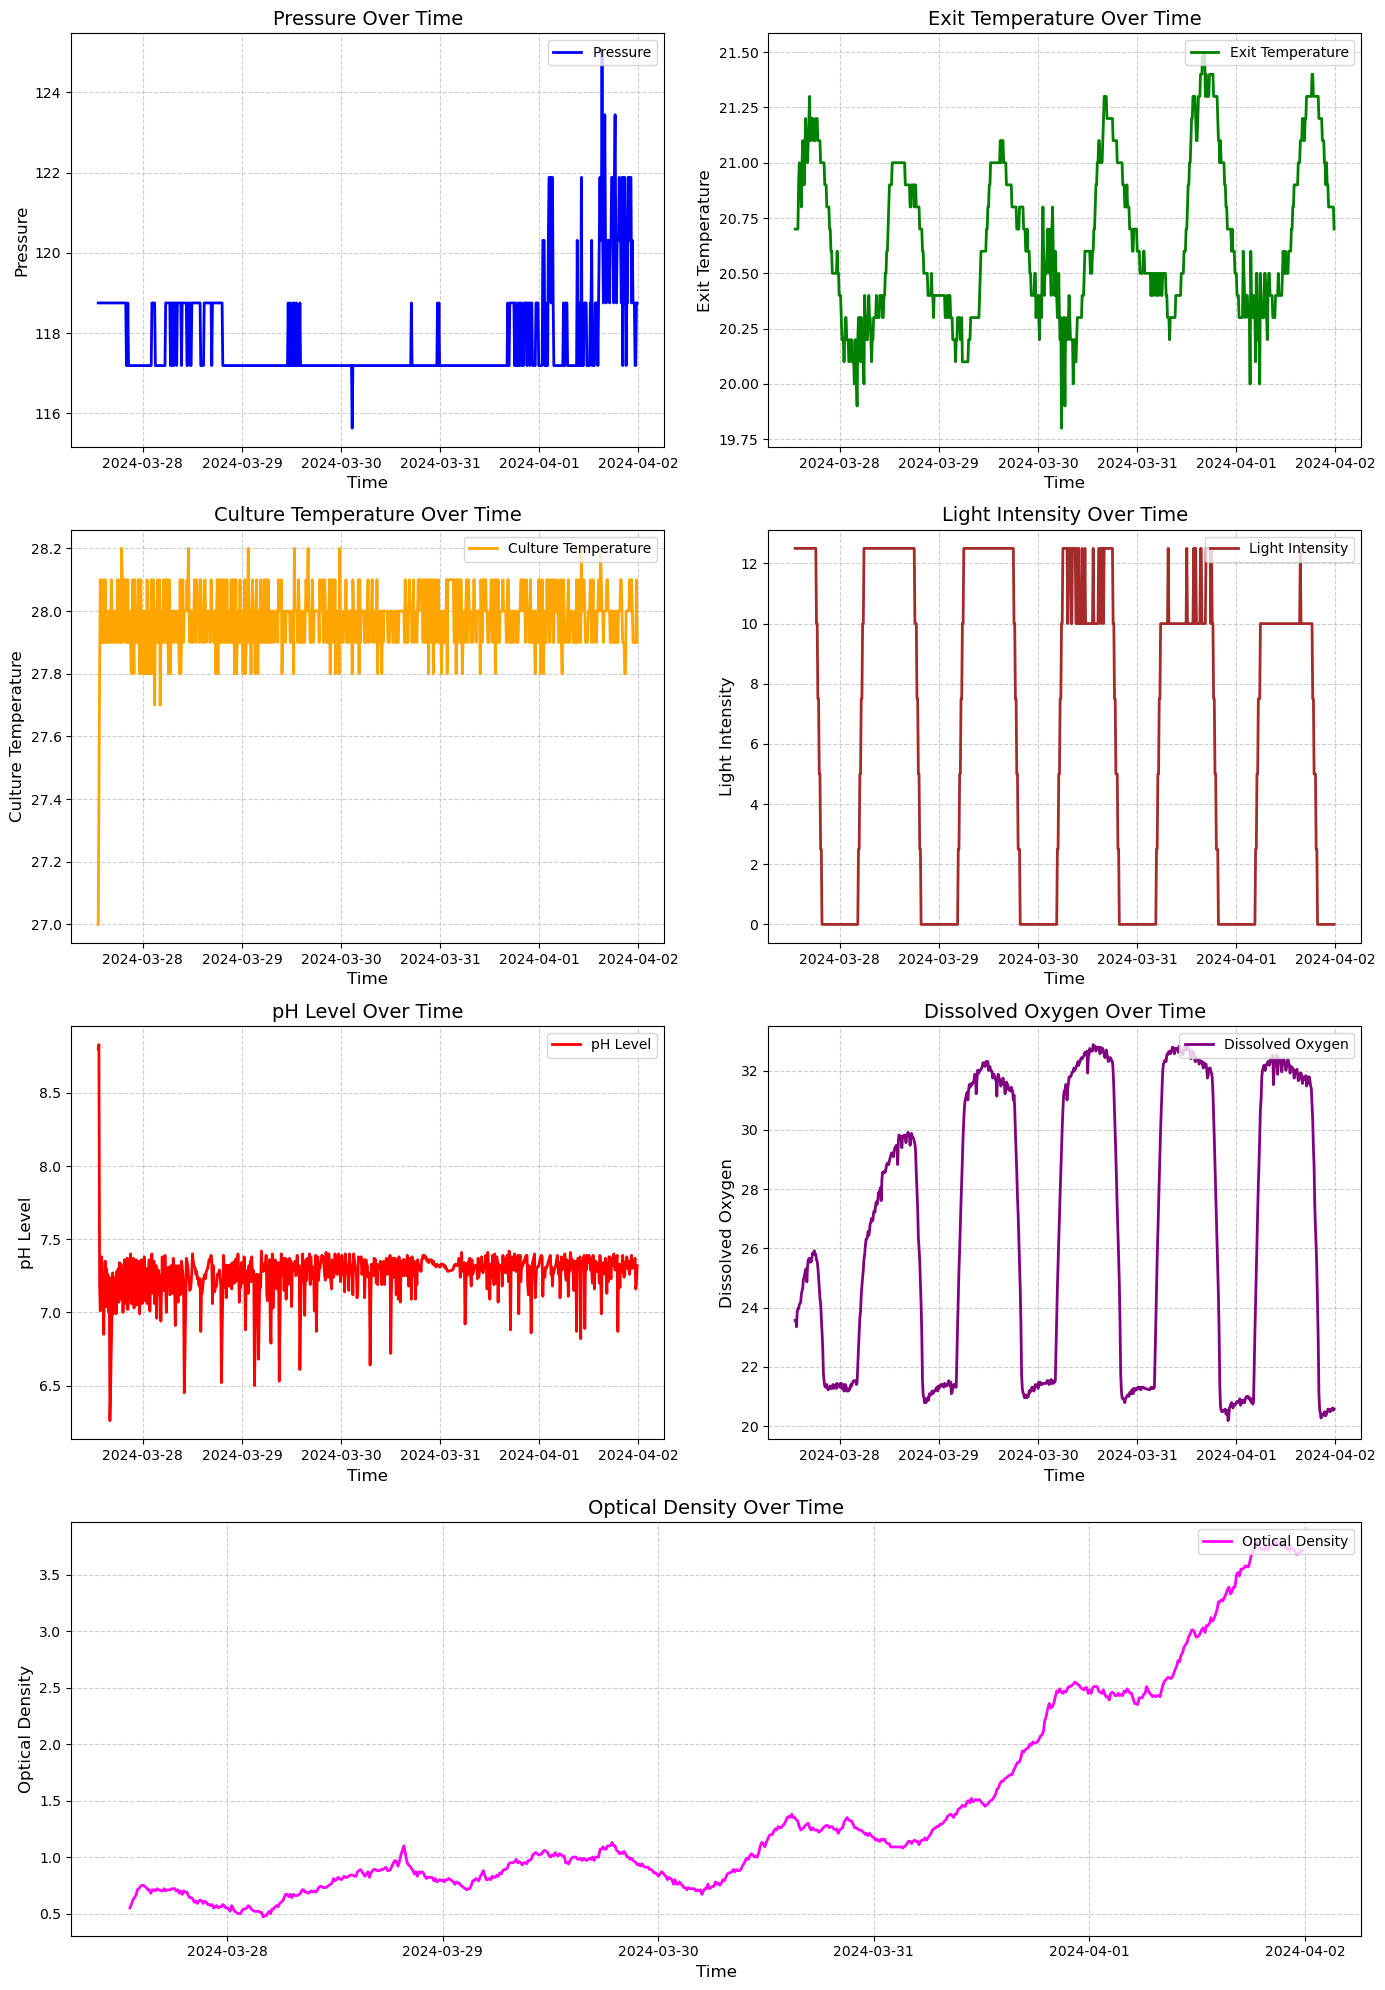

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains the relevant data
# df = pd.read_csv('your_data.csv')

# Creating subplots with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(14, 20))  # 4 rows, 2 columns

# Flatten the 2D array of axes to easily iterate through them
axs = axs.flatten()

# List of columns to plot with their new labels
columns_labels = [
    ('PRE', 'Pressure'),
    ('TEMP EXT', 'Exit Temperature'),
    ('TEMP_CULTURE', 'Culture Temperature'),
    ('PAR_LIGHT', 'Light Intensity'),
    ('PH', 'pH Level'),
    ('DO', 'Dissolved Oxygen'),
    ('OD', 'Optical Density')
]

# List of colors for each plot
colors = ['blue', 'green', 'orange', 'brown', 'red', 'purple', 'magenta']

# Plotting each column against 'Time'
for i, ((column, label), color) in enumerate(zip(columns_labels, colors)):
    axs[i].plot(df['Time'], df[column], label=label, color=color, linewidth=2)
    axs[i].set_ylabel(label, fontsize=12)
    axs[i].set_xlabel('Time', fontsize=12)
    axs[i].set_title(f'{label} Over Time', fontsize=14)
    axs[i].grid(True, linestyle='--', alpha=0.6)
    axs[i].legend(loc='upper right')

# Remove the last two subplots (last row, which has 2 axes)
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])

# Add a new subplot to the last row, centered
ax_centered = fig.add_subplot(4, 1, 4)  # 4 rows, 1 column, last plot
column, label = columns_labels[-1]  # Get the data for the last plot
color = colors[-1]
ax_centered.plot(df['Time'], df[column], label=label, color=color, linewidth=2)
ax_centered.set_ylabel(label, fontsize=12)
ax_centered.set_xlabel('Time', fontsize=12)
ax_centered.set_title(f'{label} Over Time', fontsize=14)
ax_centered.grid(True, linestyle='--', alpha=0.6)
ax_centered.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
import datetime

# Assuming df is your DataFrame with the 'Time' column
# If 'Time' is not already in datetime format, convert it
df['Time'] = pd.to_datetime(df['Time'])

start_time = datetime.datetime(2024, 3, 1)
end_time = datetime.datetime(2024, 4, 20)

# Filter the DataFrame based on 'Time' between start_time and end_time
dft = df.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Now dft contains the rows with 'Time' between start_time and end_time
print(dft)


                       Time     PRE  TEMP EXT  TEMP_CULTURE  PAR_LIGHT    PH  \
0   2024-03-27 13:12:00.000  118.75      20.7          27.0       12.5  8.80   
1   2024-03-27 13:22:00.000  118.75      20.7          27.4       12.5  8.83   
2   2024-03-27 13:32:00.000  118.75      20.7          27.8       12.5  7.19   
3   2024-03-27 13:42:00.000  118.75      20.7          28.1       12.5  7.01   
4   2024-03-27 13:52:00.000  118.75      20.7          27.9       12.5  7.20   
..                      ...     ...       ...           ...        ...   ...   
773 2024-04-01 23:02:10.775  118.75      20.8          27.9        0.0  7.34   
774 2024-04-01 23:12:11.265  117.19      20.8          27.9        0.0  7.37   
775 2024-04-01 23:22:11.755  117.19      20.8          27.9        0.0  7.16   
776 2024-04-01 23:32:12.245  118.75      20.8          28.1        0.0  7.20   
777 2024-04-01 23:42:12.735  118.75      20.7          27.9        0.0  7.32   

        DO    OD       DRY        CELL 

# Pair Plot

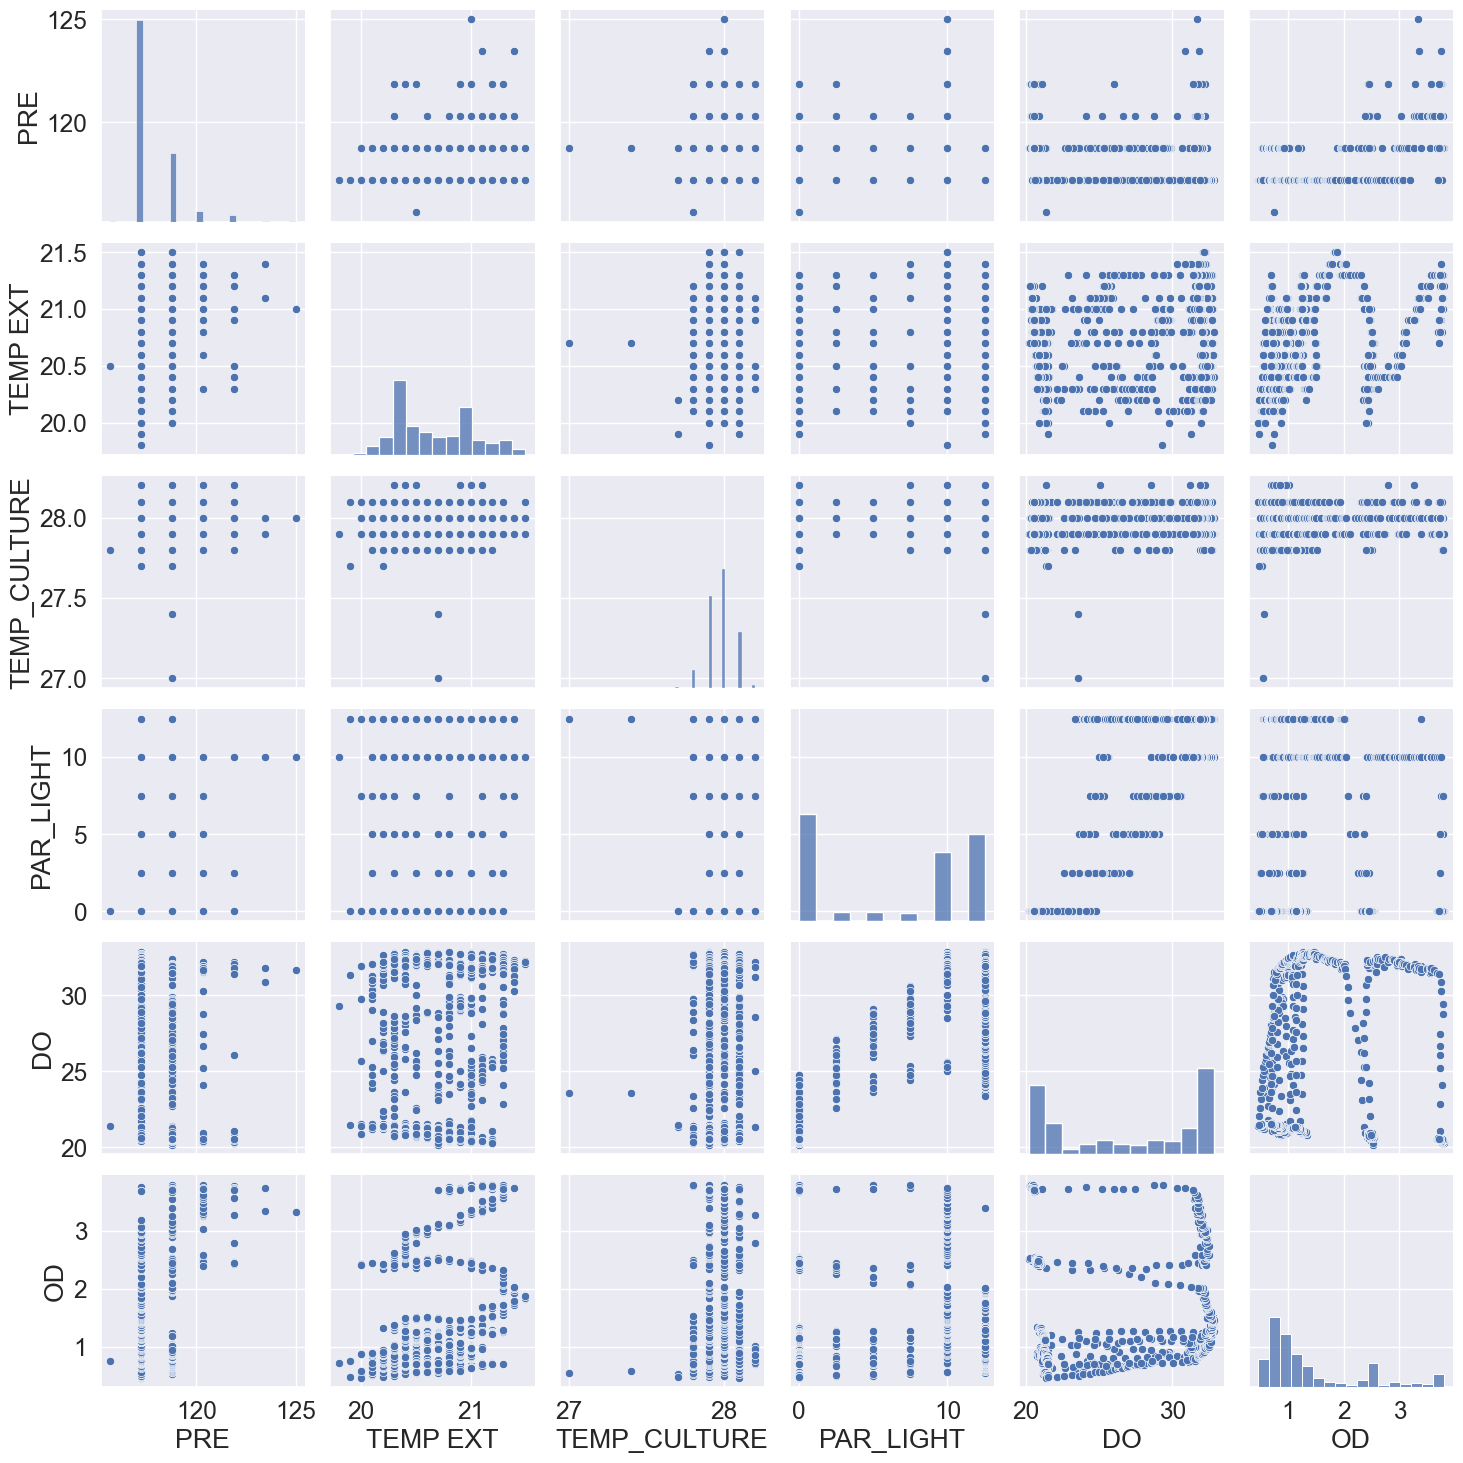

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Time' column
# Drop the 'Time' column
dftw = dft.drop(columns=['Time','VES','DES','Surface Tension','DRY','CELL','PH'])
sns.set(font_scale=1.6)  # Adjust the font scale as needed
# Create a pairplot
sns.pairplot(dftw)
plt.show()


# Correlation Matrix

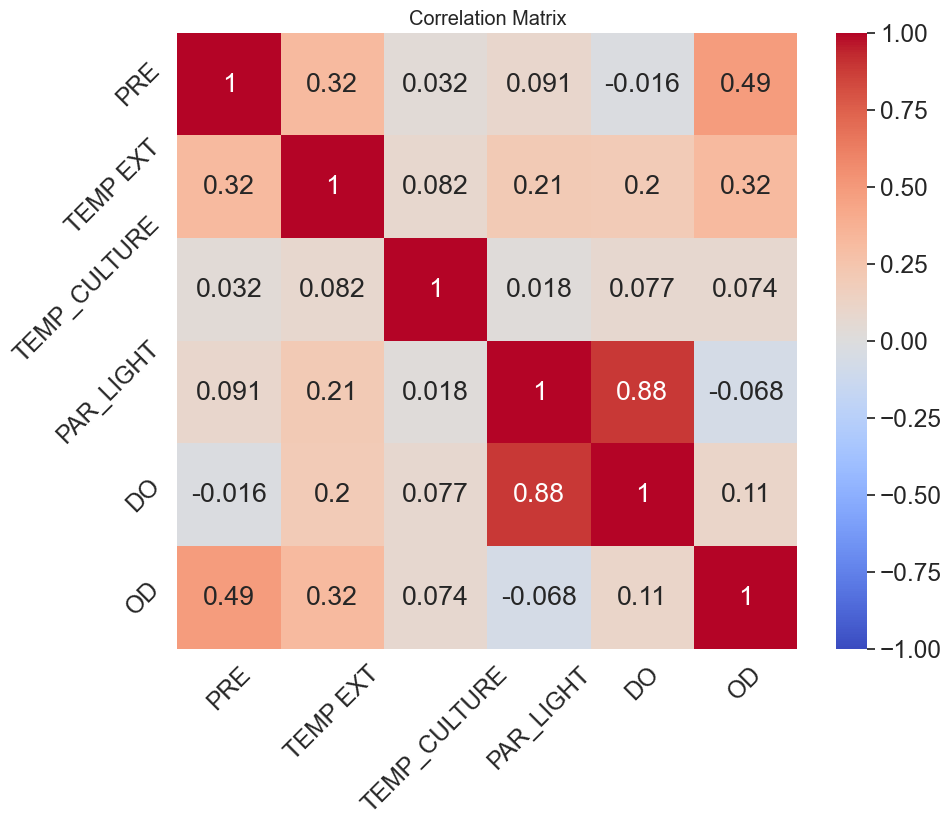

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_without_time is your DataFrame without the 'Time' column
# Calculate the correlation matrix
correlation_matrix = dftw.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.set(font_scale=1.2)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Autocorrelation 

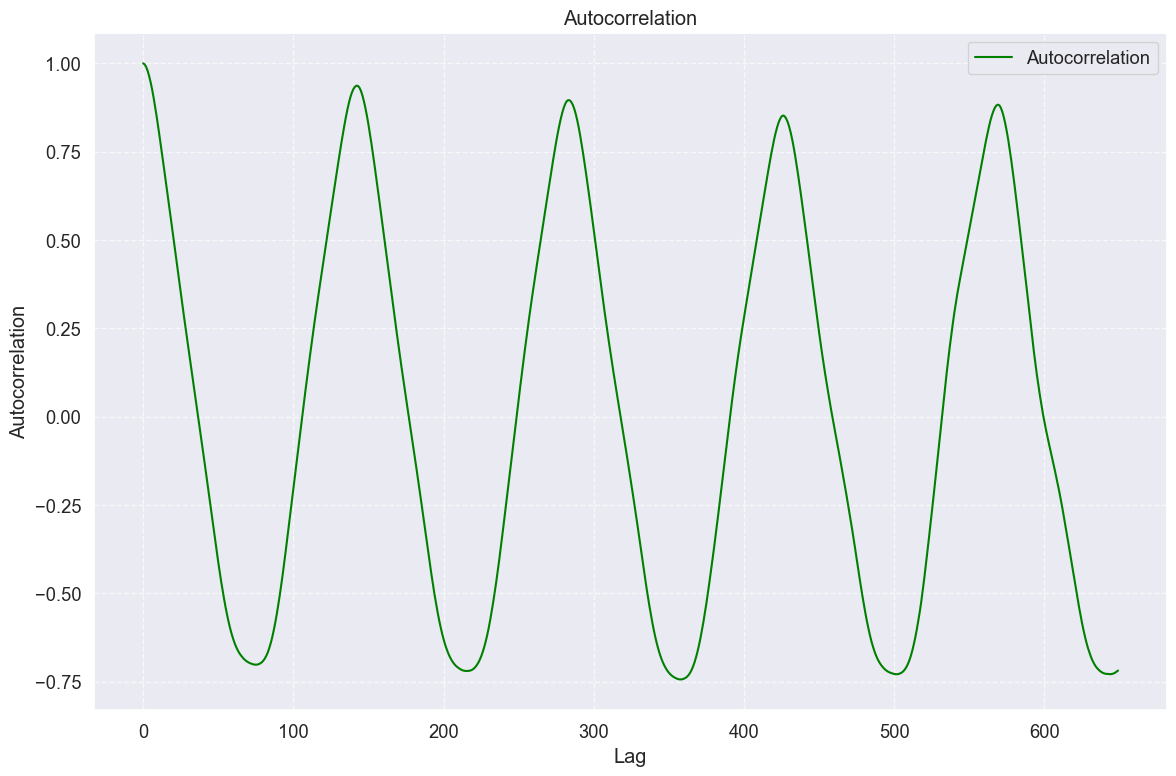

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
ac = dftw['DO'].copy()

# Set the maximum lag
max_lag = 650

# Calculate autocorrelation for the combined dataset
autocorr = [ac.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr, label='Autocorrelation', color='green')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# LSTM

Epoch 1/13


C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3524
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0844
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017   
Epoch 9/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 10/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 11/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018
Epoch 12/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 13/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error (MSE): 0.49
Mean Absolute Error (MAE): 0.51
Root Mean Squared Error (RMSE): 0.70
R-squared (R2): 0.9

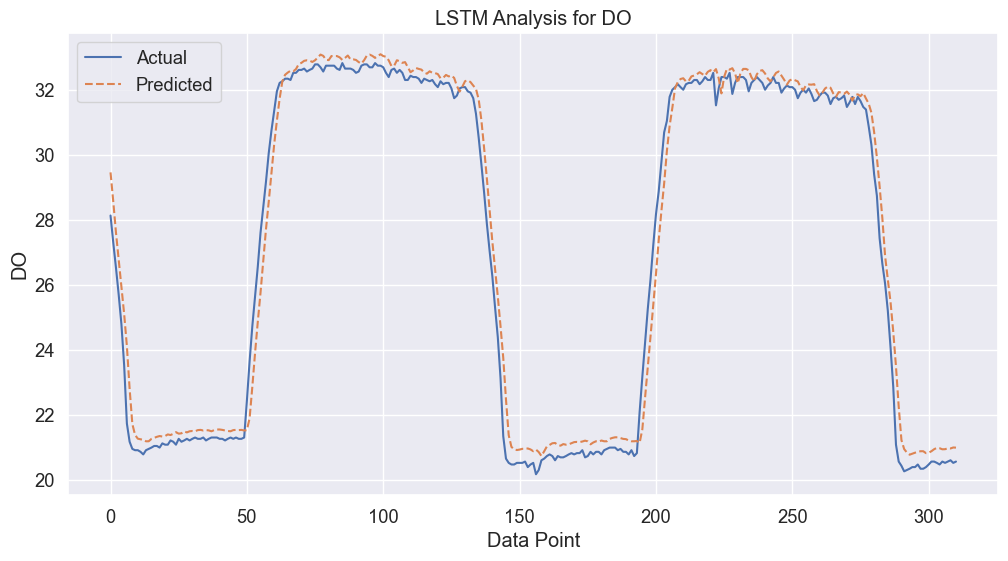

In [10]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming dftw is your dataset and 'DO' is the feature you want to predict
data = dftw[['DO']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 2

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=20, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=13, batch_size=8)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for DO')
plt.xlabel('Data Point')
plt.ylabel('DO')
plt.legend()
plt.show()


# LSTM using PAR_LIGHT and DO

C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3568 - val_loss: 0.3645
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2520 - val_loss: 0.1834
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0973 - val_loss: 0.0513
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0575 - val_loss: 0.0598
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - val_loss: 0.0304
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0268 - val_loss: 0.0232
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - val_loss: 0.0141
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - val_loss: 0.0116
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - val_loss: 0.0103
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0120
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0107 - 

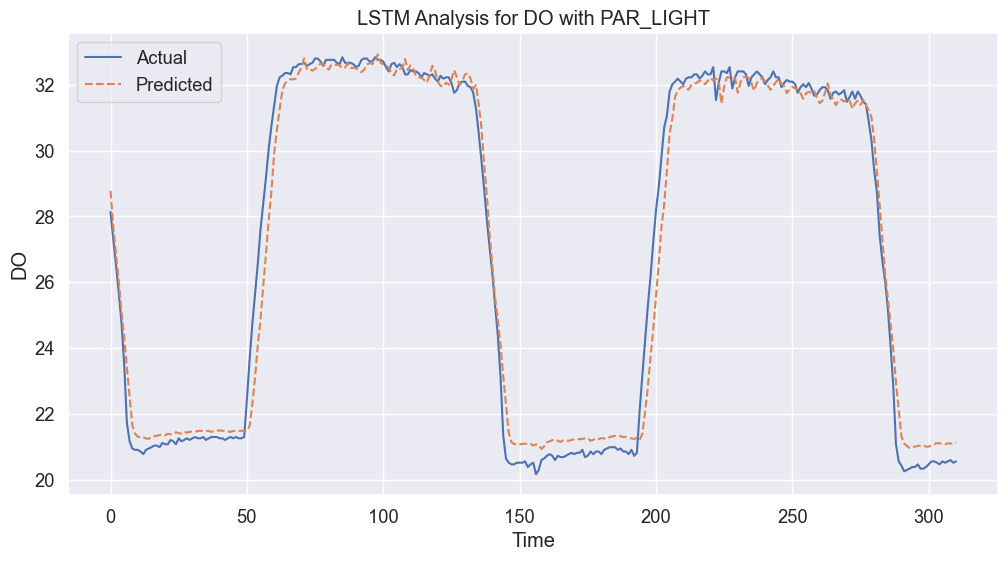

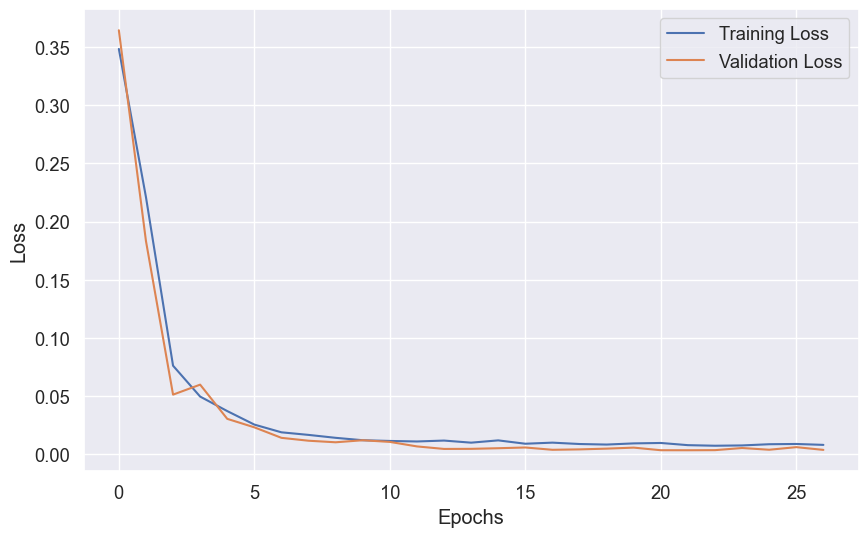

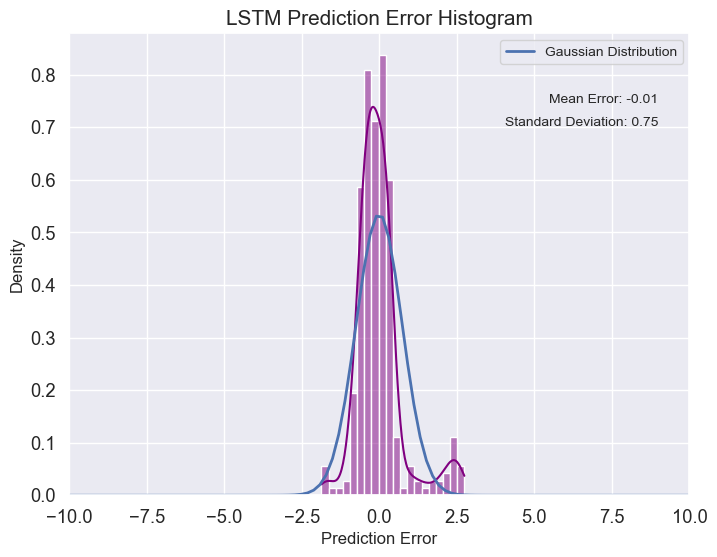

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import norm
import seaborn as sns

# Assuming dftw is your dataset
# Extract the relevant features
data = dftw[['PAR_LIGHT', 'DO']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # Features from all columns
        y.append(dataset[i + look_back, 1])  # Target 'DO'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 2

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model with added complexity and regularization
model = Sequential()
model.add(LSTM(units=32, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)

# Inverse transform the predictions
y_pred_2d = np.zeros(shape=(y_pred.shape[0], 2))
y_pred_2d[:, 1] = y_pred.copy()
y_pred = scaler.inverse_transform(y_pred_2d)[:, 1]

y_test_2d = np.zeros(shape=(y_test.shape[0], 2))
y_test_2d[:, 1] = y_test.copy()
y_test = scaler.inverse_transform(y_test_2d)[:, 1]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for DO with PAR_LIGHT')
plt.xlabel('Time')
plt.ylabel('DO')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate prediction error
error_lstm = y_test.flatten() - y_pred.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('LSTM Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

Loaded pre-trained model successfully.
Model is loaded and ready for predictions or evaluation.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Mean Squared Error (MSE): 0.75
Mean Absolute Error (MAE): 0.65
Root Mean Squared Error (RMSE): 0.86
R-squared (R2): 0.97
MAPE: 2.48


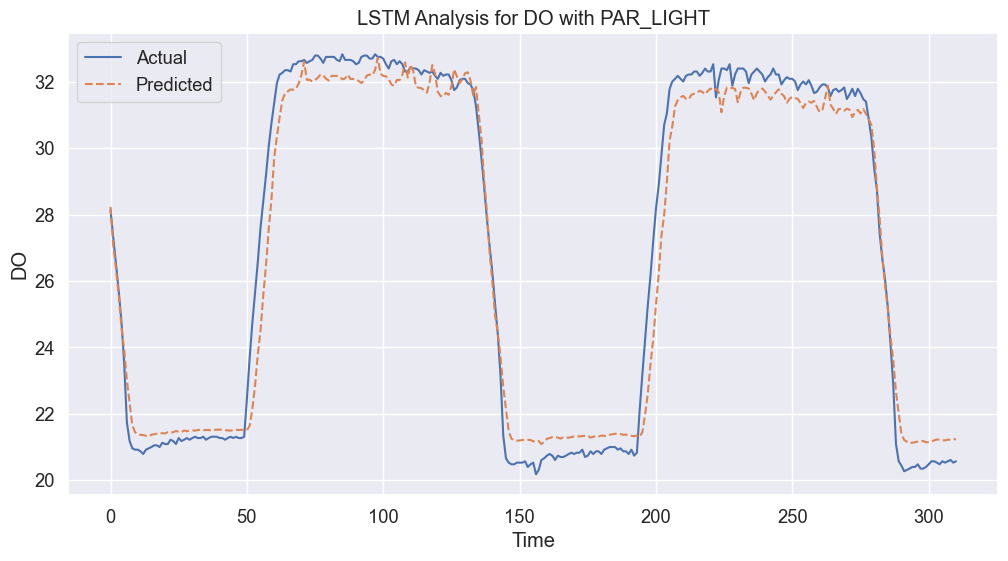

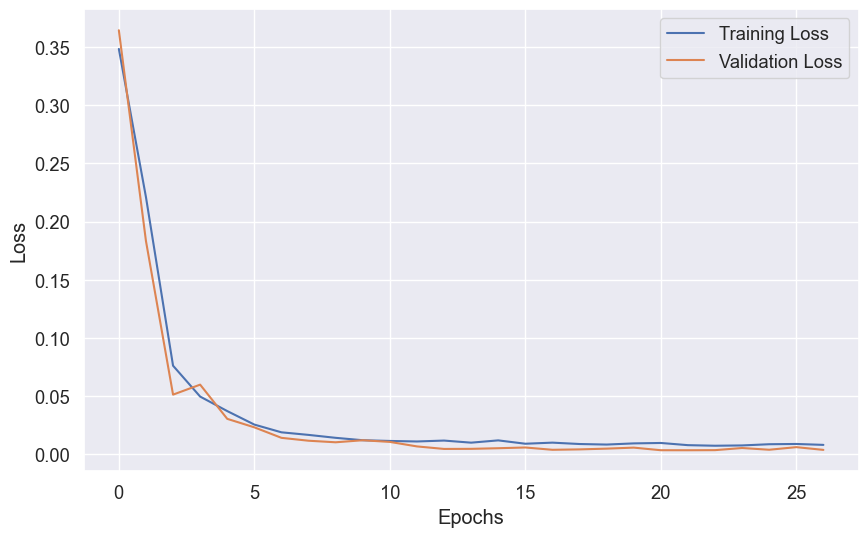

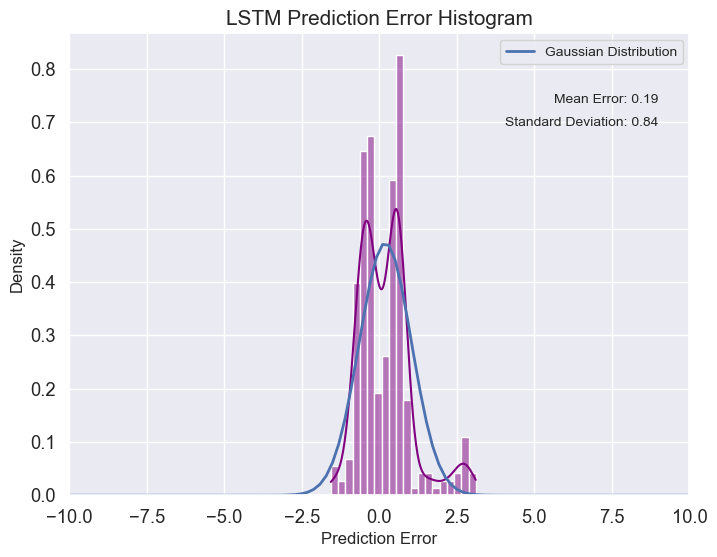

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import norm
import seaborn as sns

# Assuming dftw is your dataset
# Extract the relevant features
data = dftw[['PAR_LIGHT', 'DO']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # Features from all columns
        y.append(dataset[i + look_back, 1])  # Target 'DO'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 2

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Try to load a pre-trained LSTM model
try:
    model = load_model('pretrained_lstm_model.h5')
    print("Loaded pre-trained model successfully.")
except:
    print("No pre-trained model found, creating a new one.")

    # Build the LSTM model with added complexity and regularization
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

# If the model was not loaded successfully or needs retraining
if not hasattr(model, 'optimizer'):
    # Train the model with early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

    # Save the trained model for future use
    model.save('pretrained_lstm_model.h5')
    print("Model saved successfully.")
else:
    print("Model is loaded and ready for predictions or evaluation.")

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)

# Inverse transform the predictions
y_pred_2d = np.zeros(shape=(y_pred.shape[0], 2))
y_pred_2d[:, 1] = y_pred.copy()
y_pred = scaler.inverse_transform(y_pred_2d)[:, 1]

y_test_2d = np.zeros(shape=(y_test.shape[0], 2))
y_test_2d[:, 1] = y_test.copy()
y_test = scaler.inverse_transform(y_test_2d)[:, 1]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for DO with PAR_LIGHT')
plt.xlabel('Time')
plt.ylabel('DO')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate prediction error
error_lstm = y_test.flatten() - y_pred.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('LSTM Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Linear Regression

Relative Squared Error (RSE): 0.08
Mean Squared Error (MSE): 4.94
R-squared (R2): 0.79
Mean Absolute Error (MAE): 1.63
MAPE: 5.99


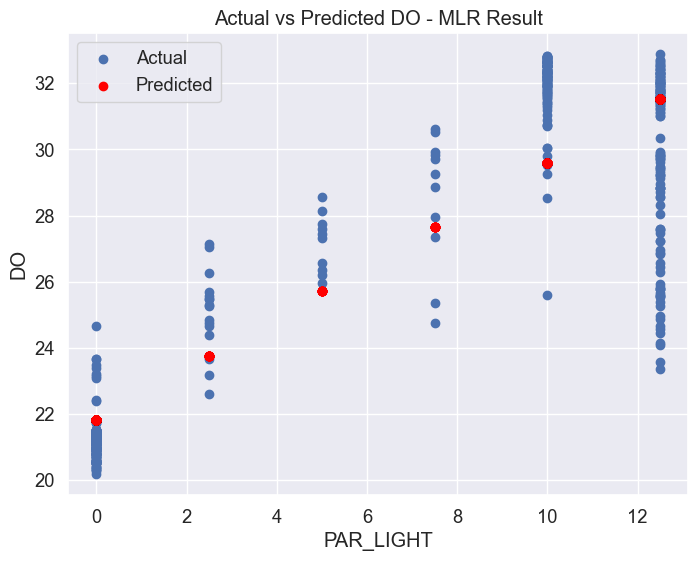

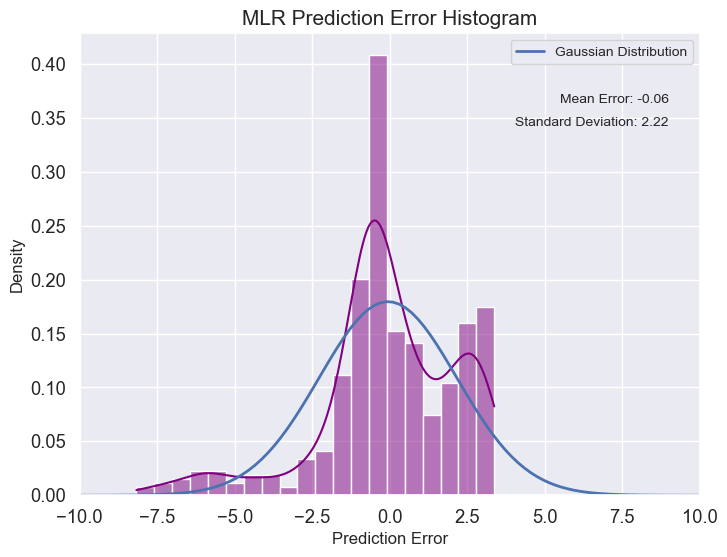

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for Linear Regression
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Initialize the Linear Regression model
lin_regressor = LinearRegression()

# Train the model
lin_regressor.fit(X_train, y_train)

# Predict on the test set
predicted_DO_test = lin_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='red', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - MLR Result')
plt.legend()
plt.show()

# Calculate prediction error
error = y_test.flatten() - predicted_DO_test.flatten()

# Plotting the histogram with Gaussian fit
plt.figure(figsize=(8, 6))
sns.histplot(error, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error = np.mean(error)
std_error = np.std(error)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error, std_error)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('MLR Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# GRNN

Epoch 1/100


C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 729.4702 - val_loss: 646.9400
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 637.9555 - val_loss: 547.6666
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 531.9973 - val_loss: 450.4613
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 428.3521 - val_loss: 362.8187
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 337.2431 - val_loss: 288.8243
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 261.0524 - val_loss: 232.5477
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 218.1488 - val_loss: 198.0554
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 172.1558 - val_loss: 182.8340
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165.6689 - val_loss: 178.8189
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 169.1685 - val_loss: 177.0927
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 167.6742 - val_loss: 174.7587
Epoch 12/100
10/10 ━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2956 - val_loss: 4.9672
Epoch 68/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7862 - val_loss: 4.9647
Epoch 69/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2934 - val_loss: 4.8908
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2588 - val_loss: 4.8891
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0681 - val_loss: 4.9395
Epoch 72/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7338 - val_loss: 4.9321
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1030 - val_loss: 4.9009
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.7385 - val_loss: 4.9512
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4297 - val_loss: 4.8711
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2502 - val_loss: 4.8696
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6311 - val_loss: 4.8617
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 

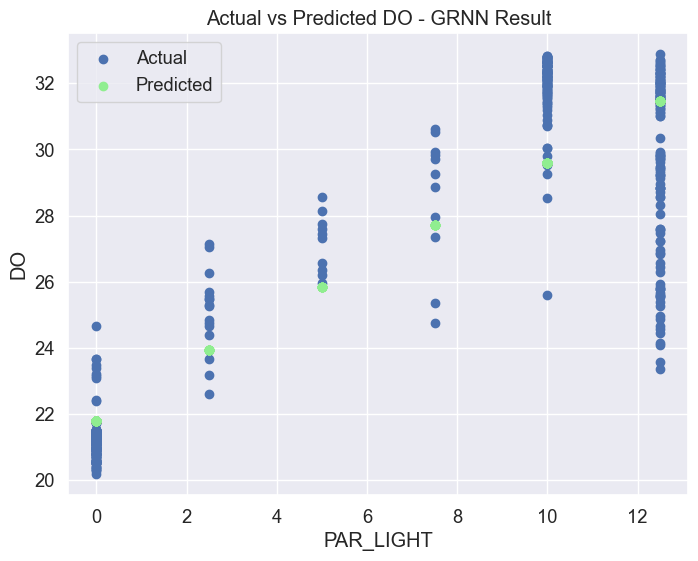

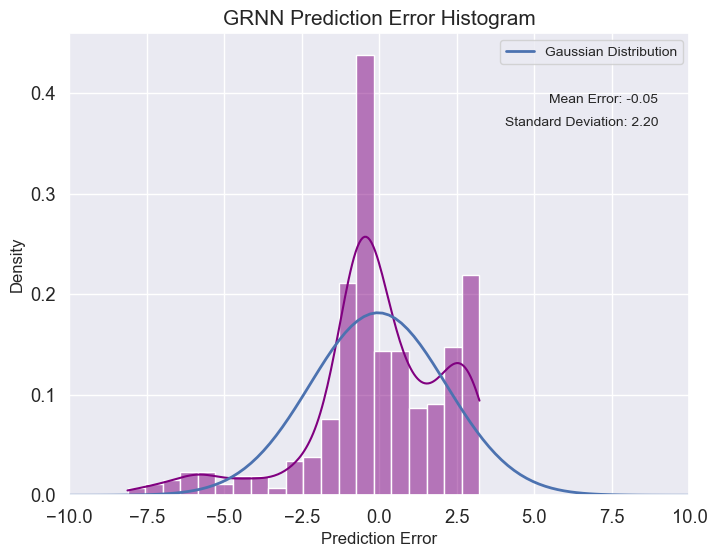

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for Keras
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # 64 neurons in the first hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in the second hidden layer
model.add(Dense(1))  # Output layer with 1 neuron (for regression)
model.compile(loss='mean_squared_error', optimizer='adam')  # Compile the model

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict on the test set
predicted_DO_test = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='lightgreen', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - GRNN Result')
plt.legend()
plt.show()

# Calculate prediction error
error_nn = y_test.flatten() - predicted_DO_test.flatten()

# Plotting the histogram with Gaussian fit
plt.figure(figsize=(8, 6))
sns.histplot(error_nn, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_nn = np.mean(error_nn)
std_error_nn = np.std(error_nn)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_nn, std_error_nn)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_nn:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_nn:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('GRNN Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# DTR

Relative Squared Error (RSE): 0.06
Mean Squared Error (MSE): 2.38
R-squared (R2): 0.90
Mean Absolute Error (MAE): 0.96
MAPE: 20.64


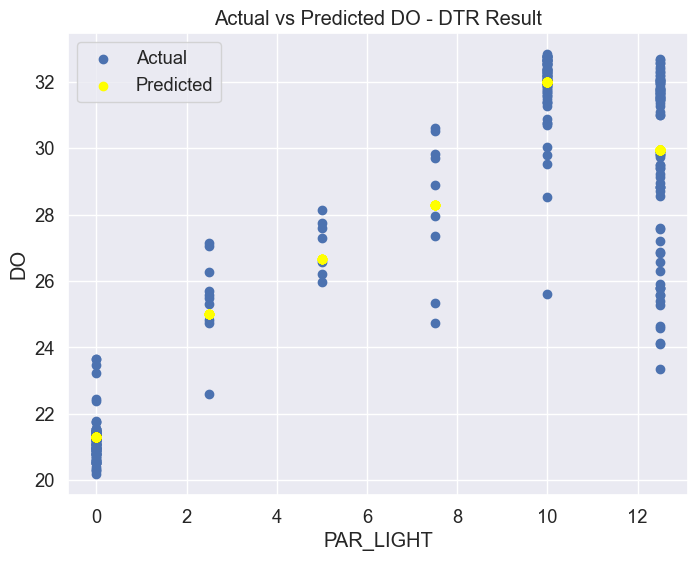

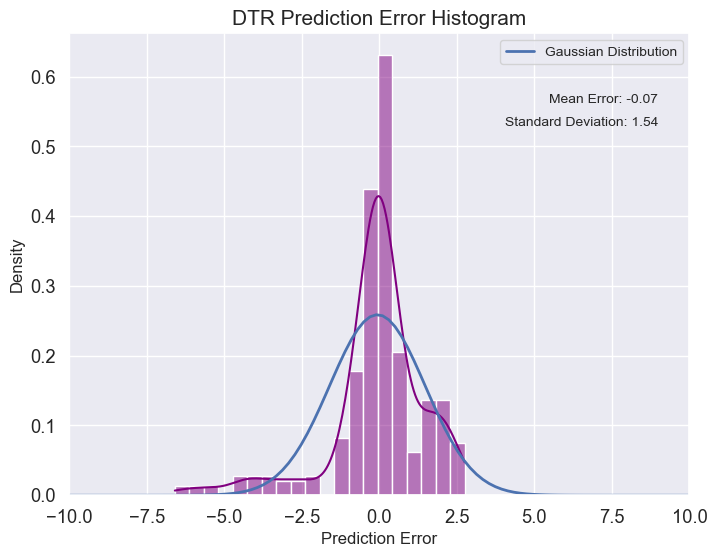

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for DecisionTreeRegressor
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
predicted_DO_test = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='yellow', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - DTR Result')
plt.legend()
plt.show()

# Calculate prediction error
error_dtr = y_test.flatten() - predicted_DO_test.flatten()

# Plotting the histogram with Gaussian fit
plt.figure(figsize=(8, 6))
sns.histplot(error_dtr, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_dtr = np.mean(error_dtr)
std_error_dtr = np.std(error_dtr)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_dtr, std_error_dtr)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_dtr:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_dtr:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('DTR Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# SVR

Relative Squared Error (RSE): 0.07
MAPE: 21.47
Mean Squared Error (MSE): 3.07
R-squared (R2): 0.87
Mean Absolute Error (MAE): 0.96


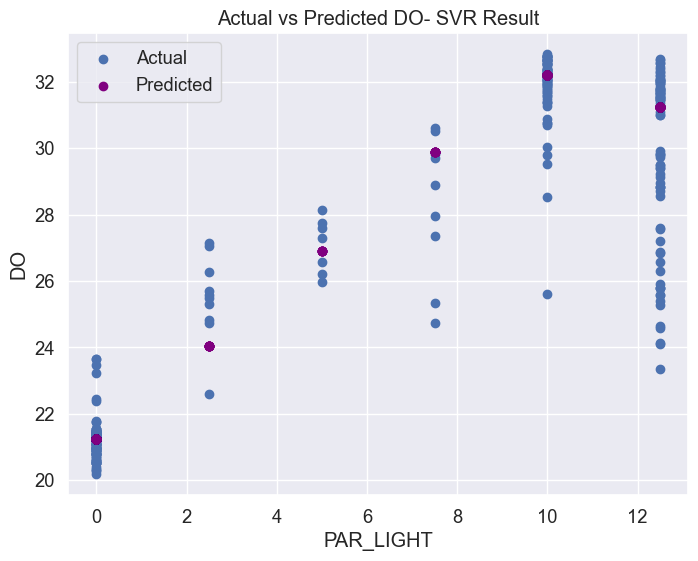

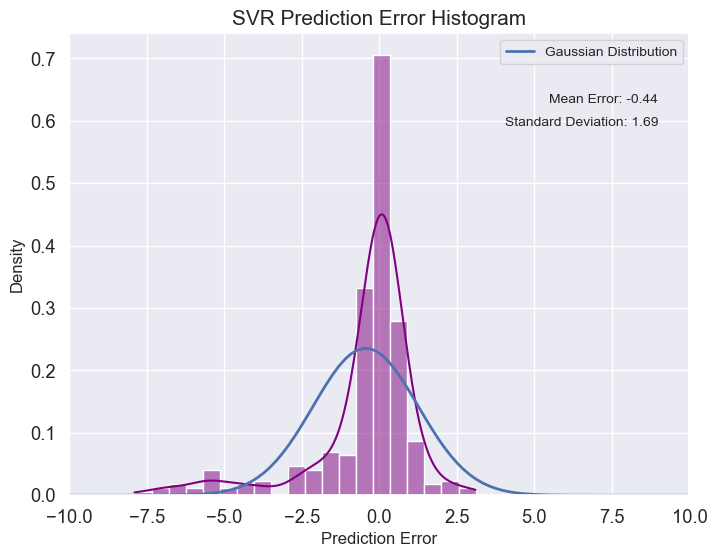

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for SVR
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train.ravel())  # ravel() is used to flatten y_train

# Predict on the test set
predicted_DO_test = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'MAPE: {mape:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='purple', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO- SVR Result')
plt.legend()
plt.show()

# Calculate prediction error
error_svr = y_test.flatten() - predicted_DO_test.flatten()

# Plotting the histogram with Gaussian fit
plt.figure(figsize=(8, 6))
sns.histplot(error_svr, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_svr = np.mean(error_svr)
std_error_svr = np.std(error_svr)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_svr, std_error_svr)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_svr:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_svr:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('SVR Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Ensemble DTR. MLR, SVR, GRNN

Ensemble Model - Relative Squared Error (RSE): 0.07
Ensemble Model - MAPE: 4.39
Ensemble Model - Mean Squared Error (MSE): 3.15
Ensemble Model - R-squared (R2): 0.87
Ensemble Model - Mean Absolute Error (MAE): 1.18


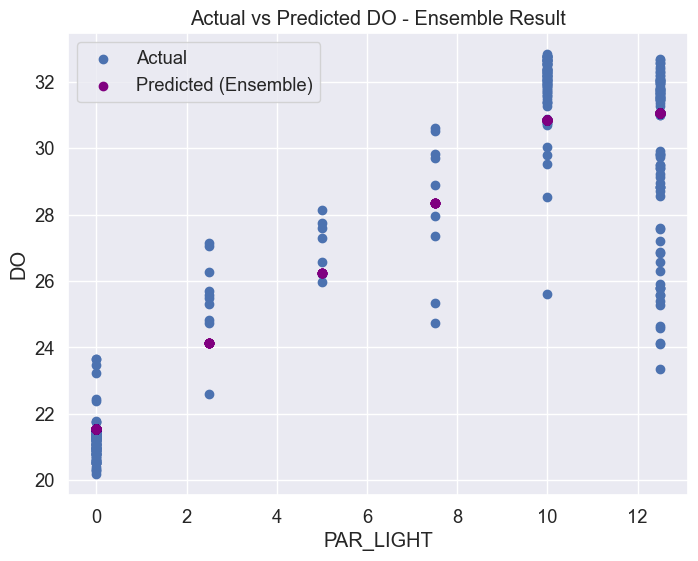

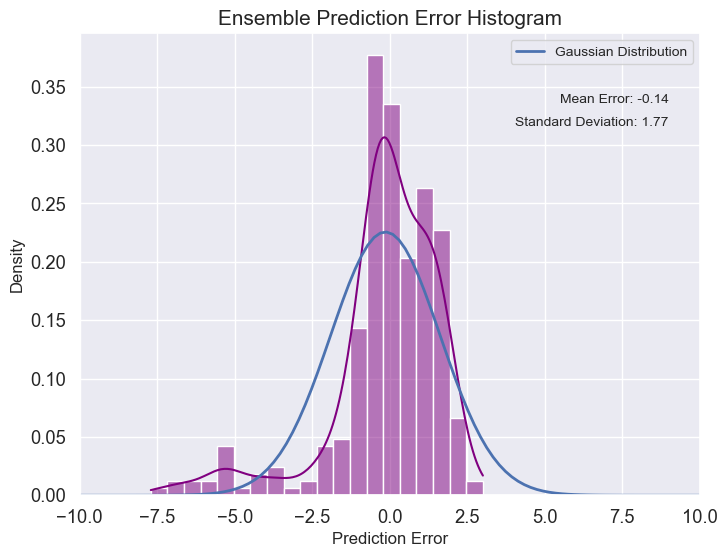

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm

# Assuming dftw is your dataset and it contains 'PAR_LIGHT' and 'DO'
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for the models
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the models
models = {
    'SVR': SVR(kernel='rbf'),
    'MLR': LinearRegression(),
    'DTR': DecisionTreeRegressor(),
    'GRNN': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Train the models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train.ravel())
    predictions[name] = model.predict(X_test)

# Ensemble method: Averaging predictions
ensemble_pred = np.mean(np.array(list(predictions.values())), axis=0)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)
mae = mean_absolute_error(y_test, ensemble_pred)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - ensemble_pred.reshape(-1, 1)) / y_test)) * 100

# Print evaluation metrics for the ensemble model
print(f'Ensemble Model - Relative Squared Error (RSE): {rse:.2f}')
print(f'Ensemble Model - MAPE: {mape:.2f}')
print(f'Ensemble Model - Mean Squared Error (MSE): {mse:.2f}')
print(f'Ensemble Model - R-squared (R2): {r2:.2f}')
print(f'Ensemble Model - Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values for the ensemble model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, ensemble_pred, color='purple', label='Predicted (Ensemble)')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - Ensemble Result')
plt.legend()
plt.show()

# Calculate prediction error for the ensemble model
error_ensemble = y_test.flatten() - ensemble_pred.flatten()

# Plotting the histogram with Gaussian fit for the ensemble model
plt.figure(figsize=(8, 6))
sns.histplot(error_ensemble, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_ensemble = np.mean(error_ensemble)
std_error_ensemble = np.std(error_ensemble)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_ensemble, std_error_ensemble)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('Ensemble Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Ensemble modeling Using GRNN, SVR and DTR

Ensemble Model - Relative Squared Error (RSE): 0.06
Ensemble Model - MAPE: 3.99
Ensemble Model - Mean Squared Error (MSE): 2.85
Ensemble Model - R-squared (R2): 0.88
Ensemble Model - Mean Absolute Error (MAE): 1.07


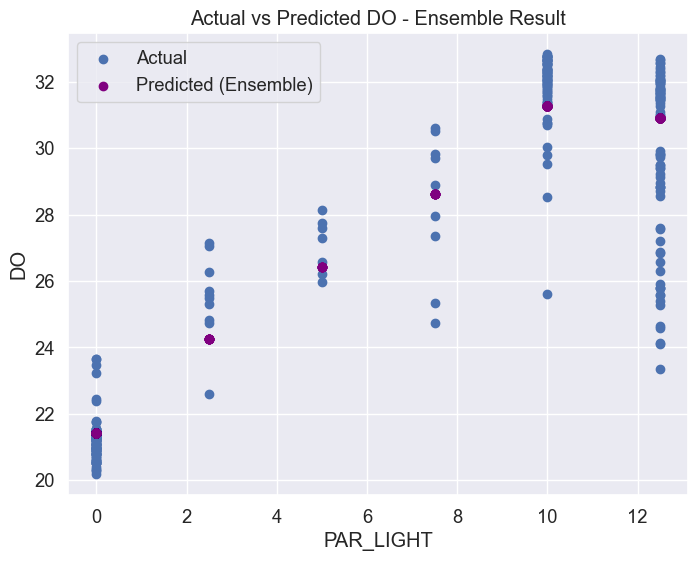

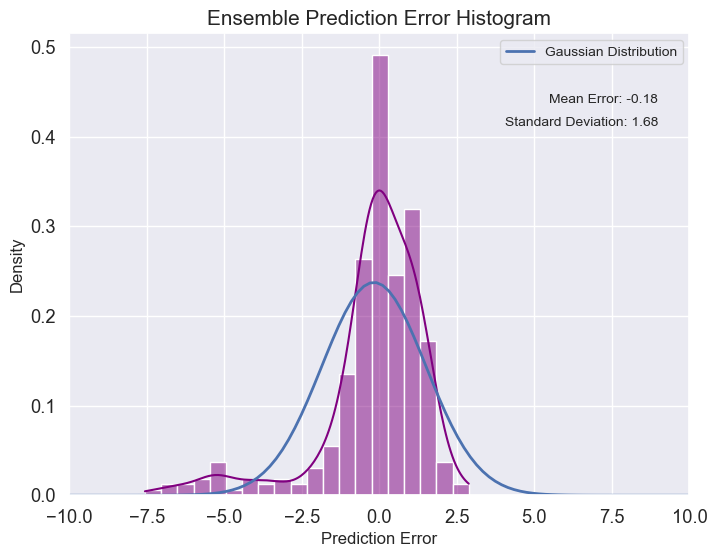

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Assuming dftw is your dataset and it contains 'PAR_LIGHT' and 'DO'
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for the models
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the models
models = {
    'SVR': SVR(kernel='rbf'),
    'DTR': DecisionTreeRegressor(),
    'GRNN': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Train the models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train.ravel())
    predictions[name] = model.predict(X_test)

# Ensemble method: Averaging predictions
ensemble_pred = np.mean(np.array(list(predictions.values())), axis=0)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)
mae = mean_absolute_error(y_test, ensemble_pred)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - ensemble_pred.reshape(-1, 1)) / y_test)) * 100

# Print evaluation metrics for the ensemble model
print(f'Ensemble Model - Relative Squared Error (RSE): {rse:.2f}')
print(f'Ensemble Model - MAPE: {mape:.2f}')
print(f'Ensemble Model - Mean Squared Error (MSE): {mse:.2f}')
print(f'Ensemble Model - R-squared (R2): {r2:.2f}')
print(f'Ensemble Model - Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values for the ensemble model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, ensemble_pred, color='purple', label='Predicted (Ensemble)')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - Ensemble Result')
plt.legend()
plt.show()

# Calculate prediction error for the ensemble model
error_ensemble = y_test.flatten() - ensemble_pred.flatten()

# Plotting the histogram with Gaussian fit for the ensemble model
plt.figure(figsize=(8, 6))
sns.histplot(error_ensemble, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_ensemble = np.mean(error_ensemble)
std_error_ensemble = np.std(error_ensemble)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_ensemble, std_error_ensemble)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('Ensemble Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Ensemble modeling Using GRNN, SVR and DTR - Weighted Averaging


Ensemble Model (Weighted) - Relative Squared Error (RSE): 0.06
Ensemble Model (Weighted) - MAPE: 3.91
Ensemble Model (Weighted) - Mean Squared Error (MSE): 2.85
Ensemble Model (Weighted) - R-squared (R2): 0.88
Ensemble Model (Weighted) - Mean Absolute Error (MAE): 1.05


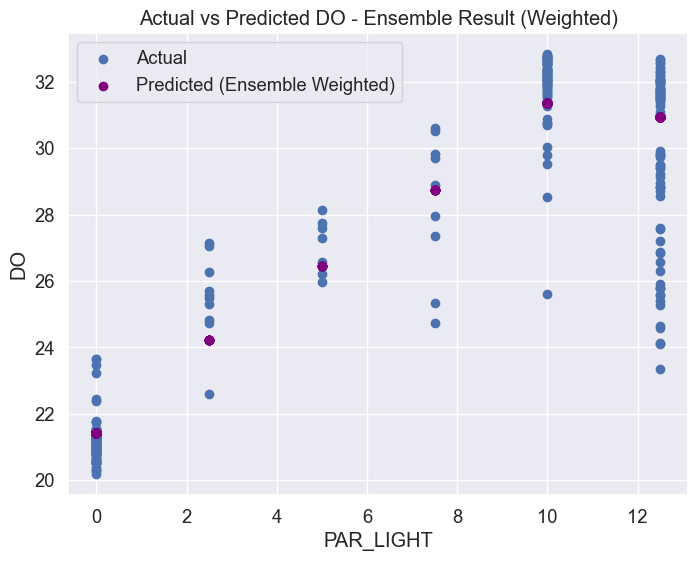

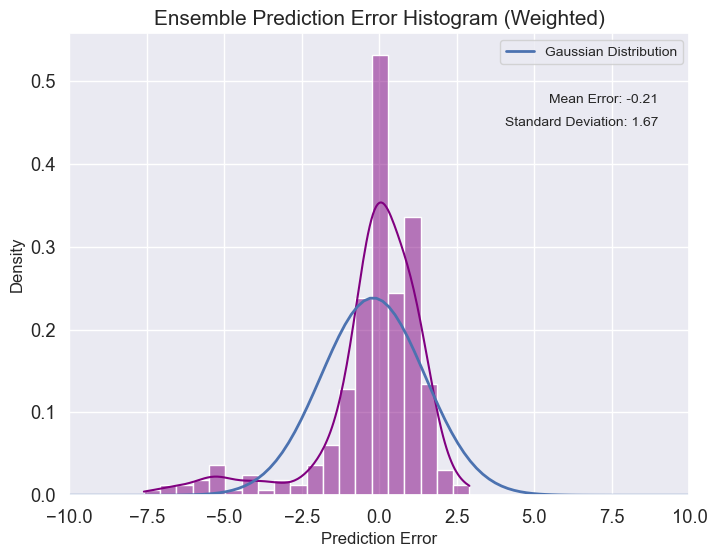

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Assuming dftw is your dataset and it contains 'PAR_LIGHT' and 'DO'
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for the models
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the models
models = {
    'SVR': SVR(kernel='rbf'),
    'DTR': DecisionTreeRegressor(),
    'GRNN': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Train the models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train.ravel())
    predictions[name] = model.predict(X_test)

# Define weights for weighted averaging
weights = {'SVR': 0.4, 'DTR': 0.3, 'GRNN': 0.3}

# Weighted averaging of predictions
ensemble_pred_weighted = np.sum([weights[name] * predictions[name] for name in models], axis=0)

# Evaluate the ensemble model with weighted averaging
mse = mean_squared_error(y_test, ensemble_pred_weighted)
r2 = r2_score(y_test, ensemble_pred_weighted)
mae = mean_absolute_error(y_test, ensemble_pred_weighted)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - ensemble_pred_weighted.reshape(-1, 1)) / y_test)) * 100

# Print evaluation metrics for the ensemble model with weighted averaging
print(f'Ensemble Model (Weighted) - Relative Squared Error (RSE): {rse:.2f}')
print(f'Ensemble Model (Weighted) - MAPE: {mape:.2f}')
print(f'Ensemble Model (Weighted) - Mean Squared Error (MSE): {mse:.2f}')
print(f'Ensemble Model (Weighted) - R-squared (R2): {r2:.2f}')
print(f'Ensemble Model (Weighted) - Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values for the ensemble model with weighted averaging
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, ensemble_pred_weighted, color='purple', label='Predicted (Ensemble Weighted)')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - Ensemble Result (Weighted)')
plt.legend()
plt.show()

# Calculate prediction error for the ensemble model with weighted averaging
error_ensemble_weighted = y_test.flatten() - ensemble_pred_weighted.flatten()

# Plotting the histogram with Gaussian fit for the ensemble model with weighted averaging
plt.figure(figsize=(8, 6))
sns.histplot(error_ensemble_weighted, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_ensemble_weighted = np.mean(error_ensemble_weighted)
std_error_ensemble_weighted = np.std(error_ensemble_weighted)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_ensemble_weighted, std_error_ensemble_weighted)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_ensemble_weighted:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_ensemble_weighted:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('Ensemble Prediction Error Histogram (Weighted)', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Stack Generalization model

Ensemble Model (Stacking with RidgeCV) - Relative Squared Error (RSE): 0.06
Ensemble Model (Stacking with RidgeCV) - MAPE: 3.55
Ensemble Model (Stacking with RidgeCV) - Mean Squared Error (MSE): 2.38
Ensemble Model (Stacking with RidgeCV) - R-squared (R2): 0.90
Ensemble Model (Stacking with RidgeCV) - Mean Absolute Error (MAE): 0.97


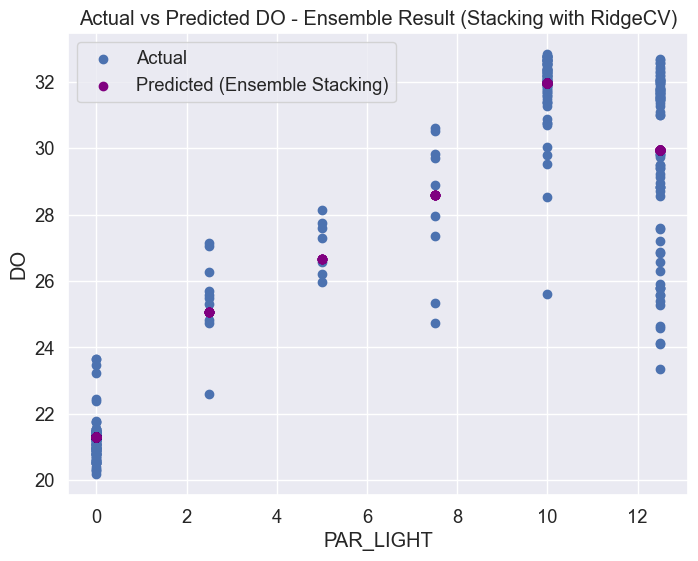

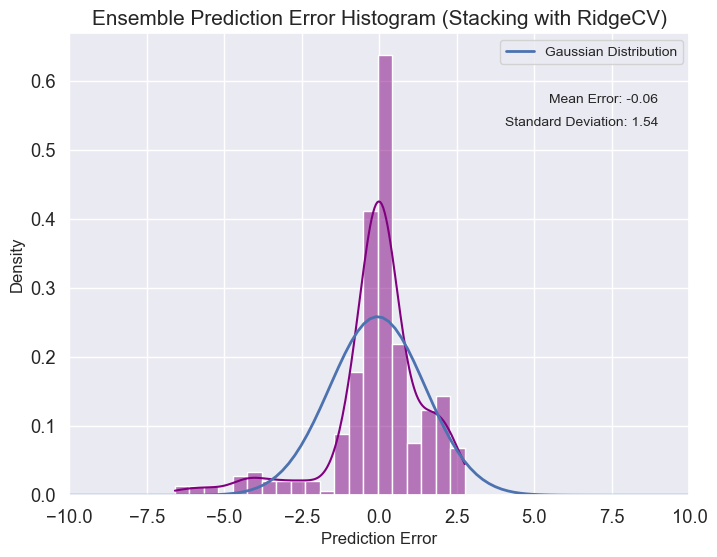

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import norm

# Assuming dftw is your dataset and it contains 'PAR_LIGHT' and 'DO'
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for the models
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the base models
base_models = {
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'DTR': DecisionTreeRegressor(max_depth=5),
    'GRNN': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Hyperparameter tuning for SVR using GridSearchCV
svr_params = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2]}
svr_grid = GridSearchCV(SVR(kernel='rbf'), svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train.ravel())
base_models['SVR'] = svr_grid.best_estimator_

# Hyperparameter tuning for DTR using GridSearchCV
dtr_params = {'max_depth': [3, 5, 7, 10]}
dtr_grid = GridSearchCV(DecisionTreeRegressor(), dtr_params, cv=5, scoring='neg_mean_squared_error')
dtr_grid.fit(X_train, y_train.ravel())
base_models['DTR'] = dtr_grid.best_estimator_

# Prepare arrays to hold out-of-fold predictions for training the meta-model
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, model) in enumerate(base_models.items()):
    test_fold_predictions = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        model.fit(X_fold_train, y_fold_train.ravel())
        
        train_meta_features[val_index, i] = model.predict(X_fold_val)
        test_fold_predictions.append(model.predict(X_test))
    
    test_meta_features[:, i] = np.mean(test_fold_predictions, axis=0)

# Hyperparameter tuning for the meta-model using RidgeCV
meta_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
meta_model.fit(train_meta_features, y_train)

# Predict using the meta-model
final_pred = meta_model.predict(test_meta_features)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, final_pred)
r2 = r2_score(y_test, final_pred)
mae = mean_absolute_error(y_test, final_pred)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - final_pred) / y_test)) * 100

# Print evaluation metrics for the ensemble model
print(f'Ensemble Model (Stacking with RidgeCV) - Relative Squared Error (RSE): {rse:.2f}')
print(f'Ensemble Model (Stacking with RidgeCV) - MAPE: {mape:.2f}')
print(f'Ensemble Model (Stacking with RidgeCV) - Mean Squared Error (MSE): {mse:.2f}')
print(f'Ensemble Model (Stacking with RidgeCV) - R-squared (R2): {r2:.2f}')
print(f'Ensemble Model (Stacking with RidgeCV) - Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values for the ensemble model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, final_pred, color='purple', label='Predicted (Ensemble Stacking)')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - Ensemble Result (Stacking with RidgeCV)')
plt.legend()
plt.show()

# Calculate prediction error for the ensemble model
error_ensemble = y_test.flatten() - final_pred.flatten()

# Plotting the histogram with Gaussian fit for the ensemble model
plt.figure(figsize=(8, 6))
sns.histplot(error_ensemble, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_ensemble = np.mean(error_ensemble)
std_error_ensemble = np.std(error_ensemble)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_ensemble, std_error_ensemble)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_ensemble:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('Ensemble Prediction Error Histogram (Stacking with RidgeCV)', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


# Ensemble Result Using LSTM

C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Ensemble Model (LSTM) - Relative Squared Error (RSE): 0.06
Ensemble Model (LSTM) - MAPE: 3.74
Ensemble Model (LSTM) - Mean Squared Error (MSE): 2.47
Ensemble Model (LSTM) - R-squared (R2): 0.90
Ensemble Model (LSTM) - Mean Absolute Error (MAE): 1.00


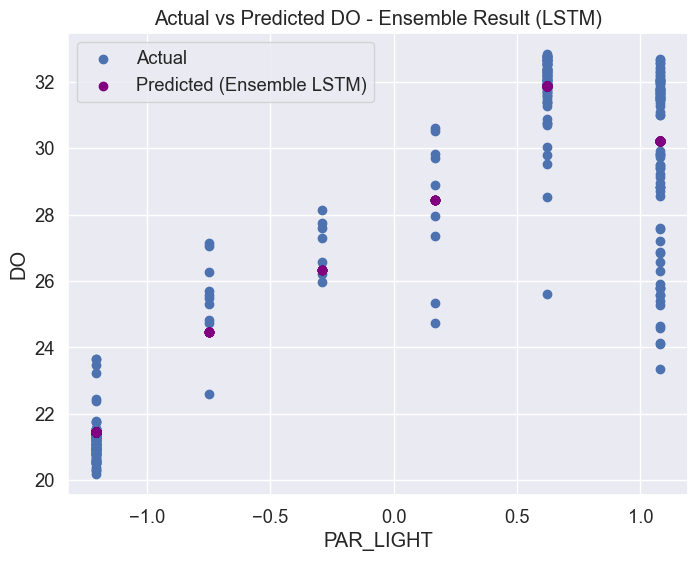

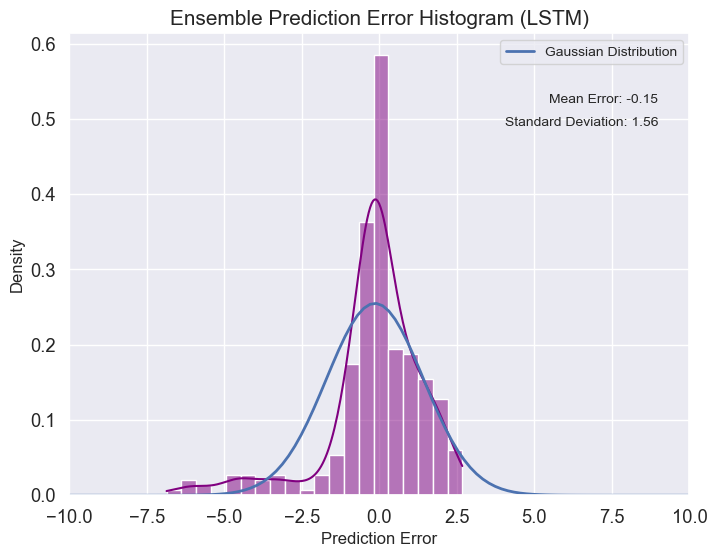

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

# Assuming dftw is your dataset and it contains 'PAR_LIGHT' and 'DO'
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for the models
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=42)

# Initialize the base models
base_models = {
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'DTR': DecisionTreeRegressor(max_depth=5),
    'GRNN': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Prepare arrays to hold out-of-fold predictions for training the meta-model
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, model) in enumerate(base_models.items()):
    test_fold_predictions = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        model.fit(X_fold_train, y_fold_train.ravel())
        
        train_meta_features[val_index, i] = model.predict(X_fold_val)
        test_fold_predictions.append(model.predict(X_test))
    
    test_meta_features[:, i] = np.mean(test_fold_predictions, axis=0)

# Reshape the predictions for LSTM input
train_meta_features_reshaped = train_meta_features.reshape((train_meta_features.shape[0], train_meta_features.shape[1], 1))
test_meta_features_reshaped = test_meta_features.reshape((test_meta_features.shape[0], test_meta_features.shape[1], 1))

# Define a function to create the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(train_meta_features_reshaped.shape[1], 1), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Example of hyperparameter values
units = 50
dropout_rate = 0.2
learning_rate = 0.001

# Initialize and train the LSTM model
lstm_model = create_lstm_model(units=units, dropout_rate=dropout_rate, learning_rate=learning_rate)
history = lstm_model.fit(train_meta_features_reshaped, y_train, epochs=100, batch_size=16, verbose=0)

# Make final predictions using the LSTM model
final_pred = lstm_model.predict(test_meta_features_reshaped)

# Inverse transform the predictions
final_pred_original = scaler_y.inverse_transform(final_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# Evaluate the LSTM meta-model
mse = mean_squared_error(y_test_original, final_pred_original)
r2 = r2_score(y_test_original, final_pred_original)
mae = mean_absolute_error(y_test_original, final_pred_original)
rse = np.sqrt(mse) / np.mean(y_test_original)
mape = np.mean(np.abs((y_test_original - final_pred_original) / y_test_original)) * 100

# Print evaluation metrics for the LSTM meta-model
print(f'Ensemble Model (LSTM) - Relative Squared Error (RSE): {rse:.2f}')
print(f'Ensemble Model (LSTM) - MAPE: {mape:.2f}')
print(f'Ensemble Model (LSTM) - Mean Squared Error (MSE): {mse:.2f}')
print(f'Ensemble Model (LSTM) - R-squared (R2): {r2:.2f}')
print(f'Ensemble Model (LSTM) - Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values for the LSTM meta-model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test_original, label='Actual')
plt.scatter(X_test, final_pred_original, color='purple', label='Predicted (Ensemble LSTM)')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO - Ensemble Result (LSTM)')
plt.legend()
plt.show()

# Calculate prediction error for the LSTM meta-model
error_ensemble_lstm = y_test_original.flatten() - final_pred_original.flatten()

# Plotting the histogram with Gaussian fit for the LSTM meta-model
plt.figure(figsize=(8, 6))
sns.histplot(error_ensemble_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_ensemble_lstm = np.mean(error_ensemble_lstm)
std_error_ensemble_lstm = np.std(error_ensemble_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_ensemble_lstm, std_error_ensemble_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_ensemble_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_ensemble_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('Ensemble Prediction Error Histogram (LSTM)', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()
